In [1]:
#mengimpor library yang dibutuhkan
import numpy as np
import pandas as pd
import scipy.stats

#menyimpan data dalam variabel df
df=pd.read_csv('dataset/nyc-rolling-sales.csv')
#mengatur tampilan data agar seluruh kolom terlihat
pd.set_option('display.max.columns', None)
#melihat 5 baris pertama data
df.head()


,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [2]:
#melihat banyaknya baris dan kolom data
df.shape

(84548, 22)

In [3]:
#Dalam analisa data ini hanya akan digunakan kolom total unit dan SALE DATE
df= df.loc[:,['SALE DATE','TOTAL UNITS']]
df

,SALE DATE,TOTAL UNITS
0,2017-07-19 00:00:00,5
1,2016-12-14 00:00:00,31
2,2016-12-09 00:00:00,17
3,2016-09-23 00:00:00,10
4,2016-11-17 00:00:00,6
...,...,...
84543,2016-11-28 00:00:00,2
84544,2017-04-21 00:00:00,2
84545,2017-07-05 00:00:00,2
84546,2016-12-21 00:00:00,7


In [4]:
#memeriksa apakah terdapat missing value
df.isnull().any()

SALE DATE      False
TOTAL UNITS    False
dtype: bool

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   SALE DATE    84548 non-null  object
 1   TOTAL UNITS  84548 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [6]:
#melihat deskripsi statustik secara ringkas
df.describe()

,TOTAL UNITS
count,84548.000000
mean,2.249184
std,18.972584
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,2261.000000


Dari summary statistik deskriptif tersebut diketahui terdapat 84548 data dengan rata-rata 2,25, nilai minimum 0 dan maximumumnya 2261 yang menunjukan rentang data yang sangat besar. Nilai kuartil 1 dan mediannya juga sama yang menunjukan banyaknya penjulan unit properti sebesar 1 per harinya

In [7]:
#mengkonversi date sales ke tipe data date time
df['SALE DATE']=pd.to_datetime(df['SALE DATE'])
df

,SALE DATE,TOTAL UNITS
0,2017-07-19,5
1,2016-12-14,31
2,2016-12-09,17
3,2016-09-23,10
4,2016-11-17,6
...,...,...
84543,2016-11-28,2
84544,2017-04-21,2
84545,2017-07-05,2
84546,2016-12-21,7


In [8]:
#mengurutkan tanggal penjualan
df=df.sort_values(by='SALE DATE')
#mengelompokan penjualan berdasarkan tanggal
df=pd.DataFrame({'TOTAL UNIT':df.groupby('SALE DATE')['TOTAL UNITS'].sum()})
df


,TOTAL UNIT
SALE DATE,
2016-09-01,656
2016-09-02,334
2016-09-03,15
2016-09-04,5
2016-09-05,6
...,...
2017-08-27,3
2017-08-28,147
2017-08-29,183


In [9]:
#modus data total unit tahun 2016
df_2016=df.loc['2016']
print(df_2016['TOTAL UNIT'].mode())
#modus data tahun 1950-2017
df_2017=df.loc['2017']
print(df_2017['TOTAL UNIT'].mode())

0     5
1    22
dtype: int64
0     4
1     9
2    14
dtype: int64


Modus data pada tahun 2016 menunjukan bahwa setiap harinya pada setiap wilayah NYC paling sering terjadi penjualan sebanyak 5 unit properti atau 22 unit(bimodal)

Sedangkan pada data tahun 2017 penjualan perharinya paling sering terjadi sebanyak 4 unit, 9 unit, atau 14 unit (trimodal)

In [10]:
df.describe()

,TOTAL UNIT
count,364.000000
mean,522.428571
std,553.316614
min,1.000000
25%,38.000000
50%,477.500000
75%,697.500000
max,3341.000000


Untuk melihat secara cepat ada atau tidaknya outlier maka akan dibuat boxplot

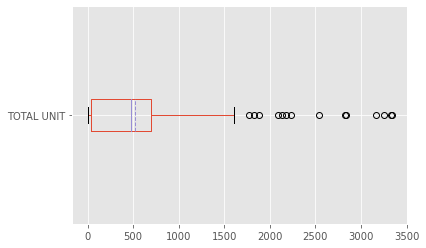

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
df['TOTAL UNIT'].plot(kind='box',vert=False, showmeans=True,
          meanline=True)
plt.show()

Dari boxplot tersebut tampak bahwa terdapat banyak outlier. Untuk melihat nilai outlier akan dilakukan perhitungan sebagai berikut :


In [12]:
#menentukan nilai kuartil 1 dan 3
q1=np.quantile(df['TOTAL UNIT'], .25)
q3=np.quantile(df['TOTAL UNIT'], .75)
#menghutung interquartil (selisih kuartil)
iqr=q3-q1
#menentukan batas data yang tidak dianggap sebagai outlier
iqr1=q1-1.5*iqr
iqr2=q3+1.5*iqr
#rentang data yang tidak mengandung outlier
print(iqr1, iqr2)

-951.25 1686.75


interval diatas merupakan minor outlier.

In [13]:
#melihat data total unit yang lebih dari 3850 (outlier)
df[df['TOTAL UNIT']>=1686]

,TOTAL UNIT
SALE DATE,
2016-09-09,3257
2016-09-30,3341
2016-10-10,1824
2016-10-26,2823
2016-11-07,3328
2016-12-08,2130
2016-12-16,3169
2017-05-15,2840
2017-05-24,2231


Dari data tersebut pada tanggal-tanggal tertentu terdapat penjualan properti yang jauh lebih tinggi dibanding tahun-tahun lainnya sehingga dalam perhitungan merupakan outlier. Disisi lain data tersebut dibutuhkan untuk mendapatkan insight sesuai kondisi yang sebenarnya terkait trend penjualan unit yang terjual dari tahun 2016-2017 sehingga outlier akan tetap dipertahankan. Naninya data ini akan diambil sample sebesar 50 data pada masing-masing tahun.

In [14]:
#melihat kemencengan(skewness) data 
skew=scipy.stats.skew(df['TOTAL UNIT'])
skew

2.2894068207563416

Kurva memiliki kemencengan 2.28 yang menunjukan kemencengan positif dimana nilai median dan modus lebih kecil dari rata-ratanya.

In [15]:
#bentuk puncak kurva (kurtosis)
kurtosis=scipy.stats.kurtosis(df['TOTAL UNIT'])
kurtosis

7.597785202438184

Nilai kurtosis lebih besar dari 3 sehingga kurva berbentuk leptokurtis

C:\Program Files (x86)\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Total Units Sales per Day in NYC 2016-2017')

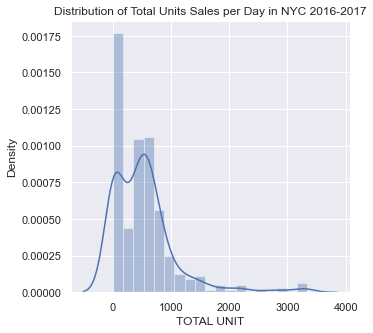

In [16]:
#membuat kurva distribusi data
import seaborn as sns
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.distplot(df['TOTAL UNIT'])
plt.title('Distribution of Total Units Sales per Day in NYC 2016-2017')

Kurva tersebut tidak membentuk distribusi normal sehingga akan menyulistkan dalam melakukan anaslisis serta pengujian hipotesis. Untuk itu, pada analasis selanjutnya akan diambil sample acak sebesar n=50 pada masing-masing tahun yaitu 2016 dan 2017

In [17]:
#Pengambilan rata2 total unit setiap 7 sample acak sebanyak 50 pada datsa penjualan tahun 2016
sample_2016=[]
n=50
for sample in range(0,n):
    np.random.seed(sample)
    values=np.random.choice(a=df_2016['TOTAL UNIT'], size=7)
    rata2=int(np.mean(values))
    sample_2016.append(rata2)
#memasukan sample pada dataframe
sample_2016=pd.DataFrame({'TOTAL UNIT SAMPLE 2016': sample_2016})
sample_2016.head()

,TOTAL UNIT SAMPLE 2016
0,1334
1,242
2,792
3,845
4,751


In [18]:
##Pengambilan rata2 total unit setiap 7 sample acak sebanyak 50 pada datsa penjualan tahun 2017
sample_2017=[]
n=50
for sample in range(0,n):
    np.random.seed(sample)
    values=np.random.choice(a=df_2017['TOTAL UNIT'], size=7)
    rata2=int(np.mean(values))
    sample_2017.append(rata2)
    
#memasukan sample pada dataframe
sample_2017=pd.DataFrame({'TOTAL UNIT SAMPLE 2017': sample_2017})
sample_2017.head()

,TOTAL UNIT SAMPLE 2017
0,638
1,259
2,221
3,348
4,365


In [19]:
#rata-rata unit yang terjual per hari 
rerata_2016=sample_2016['TOTAL UNIT SAMPLE 2016'].mean()
rerata_2017=sample_2017['TOTAL UNIT SAMPLE 2017'].mean()
print('rata-rata unit yang terjual perhari 2016 :', rerata_2016)
print('rata-rata unit yang terjual perhari 2017:', rerata_2017)

rata-rata unit yang terjual perhari 2016 : 637.04
rata-rata unit yang terjual perhari 2017: 456.18


Berdasarkan perhitungan rata-rata sample terjadi peurunan rata-rata penjualan properti pada tahun 2017 dibandingkan dengan tahun 2016. Untuk menghindari kekeliran dalam menetapkan nilai tengah maka akan dilihat mediannya.

In [20]:
#median unit yang terjual per hari 
median_2016=sample_2016['TOTAL UNIT SAMPLE 2016'].median()
median_2017=sample_2017['TOTAL UNIT SAMPLE 2017'].median()
print('median unit yang terjual perhari 2016 :', median_2016)
print('median unit yang terjual perhari 2017:', median_2017)

median unit yang terjual perhari 2016 : 618.0
median unit yang terjual perhari 2017: 424.5


nilai median juga memperlihatkan angka yang hampir sama dengan mean

In [21]:
#menentukan rentang data (range)
range_2016=np.ptp(sample_2016['TOTAL UNIT SAMPLE 2016'])
range_2017=np.ptp(sample_2017['TOTAL UNIT SAMPLE 2017'])
print('rentang data unit yang terjual 2016 :', range_2016)
print('rentang data unit yang terjual 2017 :', range_2017)

rentang data unit yang terjual 2016 : 1171
rentang data unit yang terjual 2017 : 958


In [22]:
#menentukan standar deviasi
std_2016=np.std(sample_2016['TOTAL UNIT SAMPLE 2016'], ddof=1)
std_2017=np.std(sample_2017['TOTAL UNIT SAMPLE 2017'], ddof=1)
print('standar deviasi unit yang terjual 2016 :', std_2016)
print('standar deviasi unit yang terjual 2017 :', std_2017)

standar deviasi unit yang terjual 2016 : 246.29872023994912
standar deviasi unit yang terjual 2017 : 180.9315678506599


In [23]:
#menentukan variance
var_2016=np.var(sample_2016['TOTAL UNIT SAMPLE 2016'], ddof=1)
var_2017=np.var(sample_2017['TOTAL UNIT SAMPLE 2017'], ddof=1)
print('variance unit yang terjual 2016 :', var_2016)
print('variance unit yang terjual 2017 :', var_2017)

variance unit yang terjual 2016 : 60663.059591836725
variance unit yang terjual 2017 : 32736.232244897947


In [24]:
#menentukan skewness
skew_2016=sample_2016['TOTAL UNIT SAMPLE 2016'].skew()
skew_2017=sample_2017['TOTAL UNIT SAMPLE 2017'].skew()
print('kemencenggan dari data sampel unit yang terjual perhari 2016 :', skew_2016)
print('kemencenggan dari data sampel unit yang  terjual perhari 2017:', skew_2017)

kemencenggan dari data sampel unit yang terjual perhari 2016 : 0.7507579263949905
kemencenggan dari data sampel unit yang  terjual perhari 2017: 1.2666543052702737


kedua data menunjukan kemencengan positif yang mengindikasikan bahwa jumlah unit properti yang terjual setiap tahunnya tidak merata dimana terdapat lebih banyak penjualan unit properti dengan angka rendah pada periode tersebut. Tetapi kemencengan pada data sampel 2016 lebih mendekati 0 sehingga distribusinya lebih merata/normal

In [25]:
#menentukan kurtosis
kurtosis_2016=scipy.stats.kurtosis(sample_2016['TOTAL UNIT SAMPLE 2016'])
kurtosis_2017=scipy.stats.kurtosis(sample_2017['TOTAL UNIT SAMPLE 2017'])
print('nilai kurtosis dari data total unit yang terjual 2016 :', kurtosis_2016)
print('nilai kurtosis dari data total unit yang terjual 2017:', kurtosis_2017)

nilai kurtosis dari data total unit yang terjual 2016 : 0.9962781541891546
nilai kurtosis dari data total unit yang terjual 2017: 2.6238919968295678


nilai kurtosis_1 menujukan bentuk kurva platikurtis
nilai kurtosis_2 menujukan bentuk kurva mesokurtis

karena nilai kurtosis_2 mendekati kondisi ideal (nilai kurtosis=3) maka dapat dikatakan total unit yang terjual pada 2017 penjualannya lebih merata/hampir sama. Sedangkan nilai kurtosis_1 yang lebih kecil dari 3 menunjukan terdapat total unit yang tejual dengan angka yang sama dalam frekuensi yang lebih kecil.

C:\Program Files (x86)\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Total Units Sales in NYC 2016')

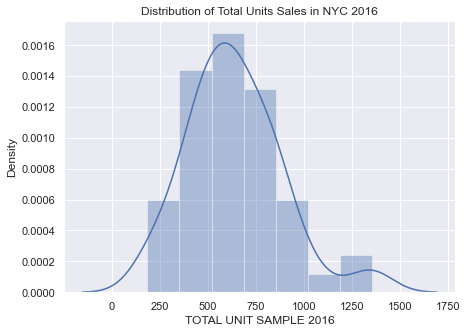

In [26]:
#membuat plot distribusi kedua data
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(7,5)})
sns.distplot(sample_2016['TOTAL UNIT SAMPLE 2016'])
plt.title('Distribution of Total Units Sales in NYC 2016')

kurva distribusi sdari sampel 2016 terlihat cukup simetris dimana nilai median hampir sama dengan nilai mean membentuk kurva istribusi normal

C:\Program Files (x86)\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Total Units Sales in NYC 2017')

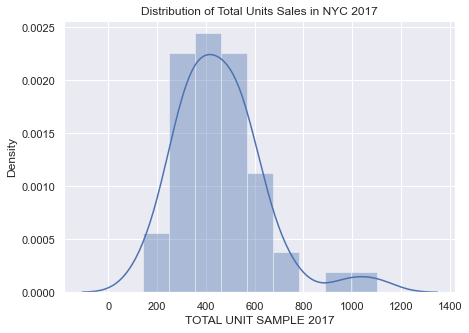

In [27]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(7,5)})
sns.distplot(sample_2017['TOTAL UNIT SAMPLE 2017'])
plt.title('Distribution of Total Units Sales in NYC 2017')

Meskipun bentuk kurva memuncak keatas (leptokurtis)m, namun kurva cukup simeris dan membentuk kurva distribusi normal

In [28]:
#menghitung confidence interval mean dari sample 2016 dengan tingkat keercayaan 95%
z=1.96
n=50
se_2016=std_2016/np.sqrt(n)
lower_limit_2016=round(rerata_2016-se_2016*z, ndigits=2)
upper_limit_2016=round(rerata_2016+se_2016*z, ndigits=2)
print('Confidence Interval sampel 2016 :',lower_limit_2016,'-',upper_limit_2016 )

#menghitung confidence interval mean dari sample 2017 dengan tingkat keercayaan 95%
z=1.96
n=50
se_2017=std_2017/np.sqrt(n)
lower_limit_2017=round(rerata_2017-se_2017*z, ndigits=2)
upper_limit_2017=round(rerata_2016+se_2017*z, ndigits=2)
print('Confidence Interval sampel 2017 :',lower_limit_2017,'-',upper_limit_2017 )

Confidence Interval sampel 2016 : 568.77 - 705.31
Confidence Interval sampel 2017 : 406.03 - 687.19


Dari perhitungan statistik deskriptif untuk sampel total unit yang terjual pada tahun 2016 dan 2017 didapat beberapa informasi yang mengarahkan dugaan atau hipotesis sebagai berikut :

* Penjualan harian unit properti pada tahun 2016 lebih tinggi dibandingkan penjualan harian unit properti tahun 2017


- H0 : mu1 = mu2
- H1=mu1>mu2

In [29]:
#Uji hipotesis dengan z-test
import statsmodels.api as sm
sm.stats.ztest(sample_2016['TOTAL UNIT SAMPLE 2016'],sample_2017['TOTAL UNIT SAMPLE 2017'],alternative='larger')

(4.184617211434134, 1.4282351529633222e-05)

Karena nilai p-value sangat kecil (<0.05) maka hipotesis null ditolak dan hipotesis aletrnatif diterima.

Dengan demikian dapat ditarik kesimpulan bahwa penjualan harian unit properti pada tahun 2016 lebih tinggi dibandingkan penjualan harian unit properti pada tahun 2017